<a href="https://colab.research.google.com/github/SushmitaSingh96/WEcomSitePrediction/blob/main/WcomProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

#pre-processing libraries
import string, nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

#Modelling
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushmitasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.DataFrame(pd.read_csv('Womens Clothing E-Commerce Reviews.csv'))

In [ ]:
df = df.iloc[: , 2:]

In [ ]:
df

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
#Extract the the unique and missing count of each column
umcounter = []
for i in df.columns:
    umcounter.append([i,len(df[i].unique()),df[i].isnull().sum()])

pd.DataFrame(umcounter,columns=['Columns','Unique','Missing']).set_index('Columns').T

#The T at the end for transpose. 

Columns,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,77,13994,22635,5,2,82,4,7,21
Missing,0,3810,845,0,0,0,14,14,14


In [ ]:
for x in ['Review Text','Division Name','Department Name','Class Name']:
    df = df[df[x].notnull()]

In [ ]:
df['Title'].fillna('',inplace=True)

In [ ]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

In [ ]:
#np.savetxt(r'title.txt', df['Title'], fmt='%s')

# EDA

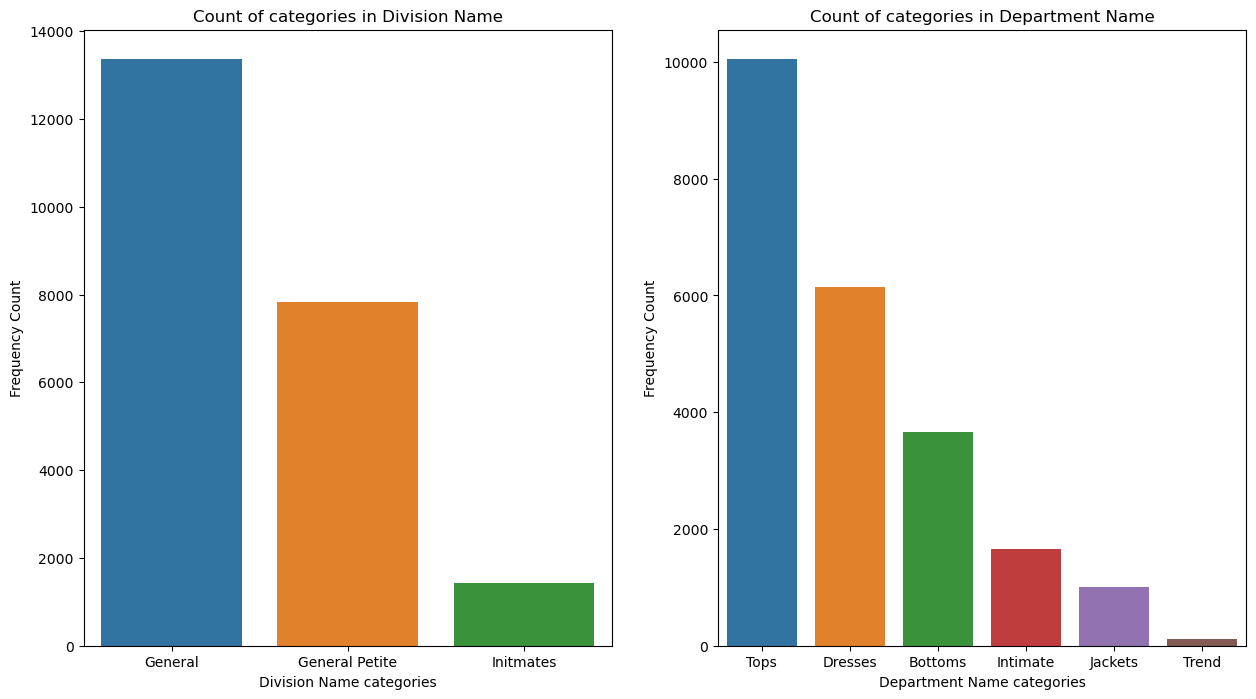

In [ ]:
rows = ['Division Name','Department Name']
fig,axes = plt.subplots(1, 2, figsize=(15,8))
for i,r in enumerate(rows):
    sns.countplot(data=df,x=r,order=df[r].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of categories in {}".format(r))
    axes[i].set_ylabel("Frequency Count")
    axes[i].set_xlabel('{} categories'.format(r))
plt.savefig("DivisionAndDept")

/var/folders/jb/8jhfxt995dg8bht02f69ds4w0000gn/T/ipykernel_1862/3632441002.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


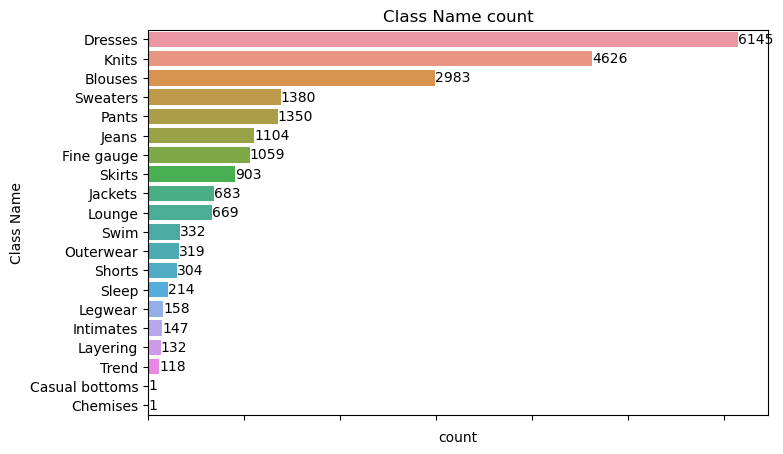

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y='Class Name',data=df,order=df['Class Name'].value_counts().index )
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Class Name count")
plt.savefig("Class")

/var/folders/jb/8jhfxt995dg8bht02f69ds4w0000gn/T/ipykernel_1862/1992184030.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


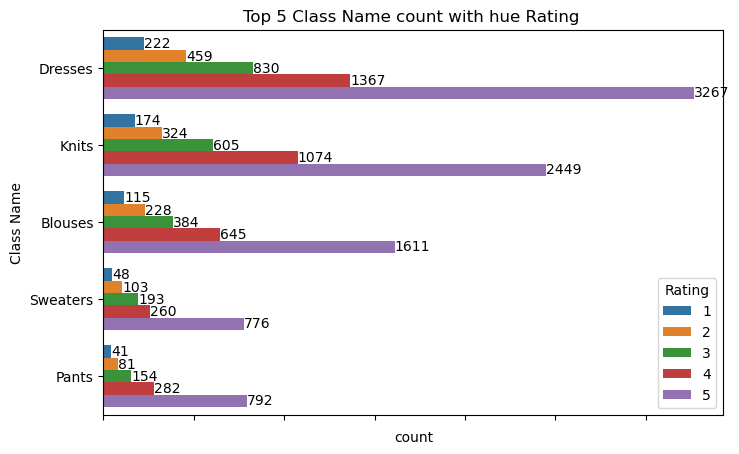

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y='Class Name',data=df,order=df['Class Name'].value_counts()[0:5].index, hue='Rating' )
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Top 5 Class Name count with hue Rating ")
plt.savefig("ClassAndRating")

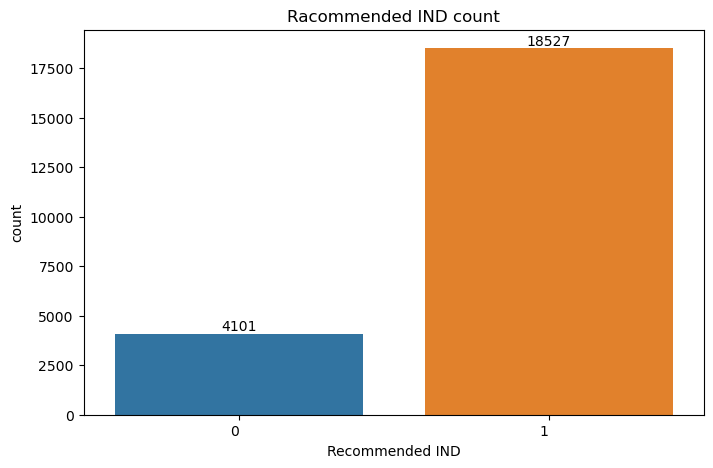

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Recommended IND',data=df )
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Racommended IND count")
plt.savefig("TargetClass")

<Figure size 1000x500 with 0 Axes>

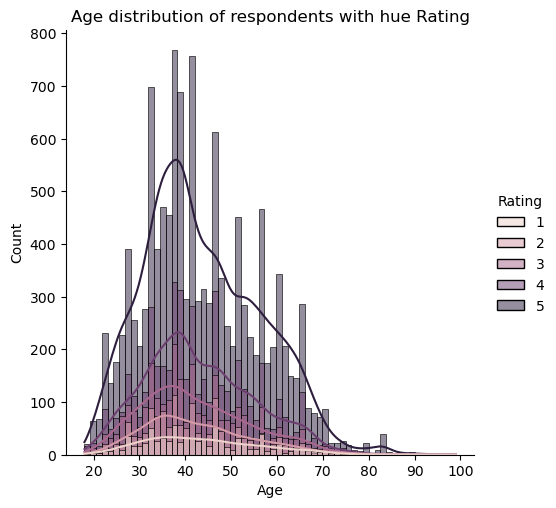

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x="Age", kde=True, hue='Rating')
plt.title("Age distribution of respondents with hue Rating")
plt.savefig("AgeDist")

In [ ]:
df.shape

(22628, 9)

In [ ]:
print("DataFrame Dimension: Rows {}, Columns {}".format(*df.shape))

DataFrame Dimension: Rows 22628, Columns 9


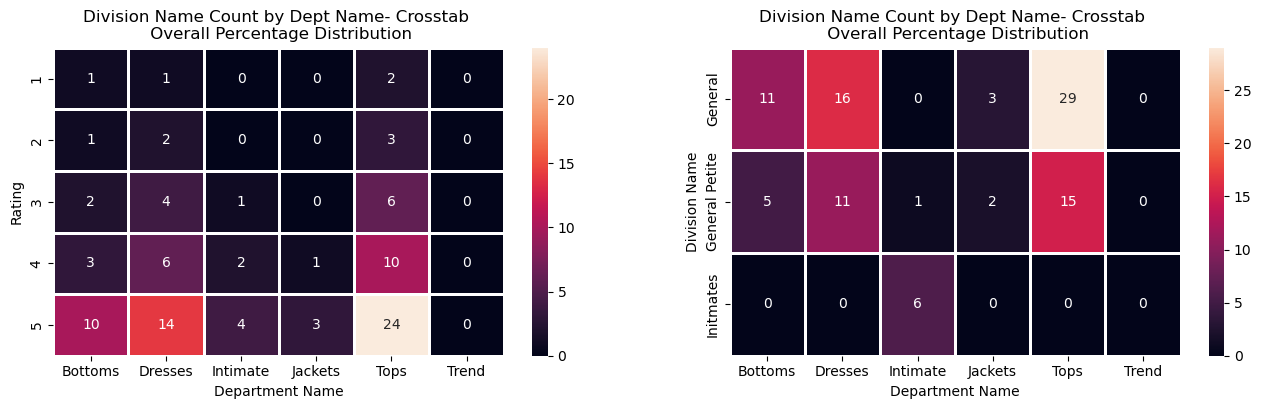

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.heatmap(pd.crosstab(df['Rating'],df['Department Name'],normalize=True).mul(100).round(0),annot=True, ax=ax[0],linewidths=2)
ax[0].set_title('Division Name Count by Dept Name- Crosstab \n Overall Percentage Distribution')

#we normalize the crosstab table. 
sns.heatmap(pd.crosstab(df['Division Name'],df['Department Name'],normalize=True).mul(100).round(0),annot=True, ax=ax[1],linewidths=2)
ax[1].set_title('Division Name Count by Dept Name- Crosstab \n Overall Percentage Distribution')
plt.savefig("Heatmap")

# Pre-process the textual data

In [ ]:
from nltk import word_tokenize, sent_tokenize

In [ ]:
#Remove punctuation marks
import string
def removePunc(raw):
    no_punc = [review for review in raw if review not in string.punctuation]
    clean = ''.join(no_punc)
    return clean


df['Review Text'] = df['Review Text'].apply(lambda x: removePunc(x))

In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

In [ ]:
#nltk.download('punkt')

In [ ]:
df['Review Text'] = df['Review Text'].str.lower()

In [ ]:
df['Review Text']

0        absolutely wonderful  silky and sexy and comfo...
1        love this dress  its sooo pretty  i happened t...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit its fun flirty ...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes soft stretc...
23483    this fit well but the top was very see through...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

In [ ]:
"""
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    
"""


"\nfrom wordcloud import WordCloud, STOPWORDS\n\ndef wc(data,bgcolor,title):\n    plt.figure(figsize = (100,100))\n    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)\n    wc.generate(' '.join(data))\n    plt.imshow(wc)\n    plt.axis('off')\n    \n"

In [ ]:
fd = nltk.FreqDist(df['Review Text'])
np.savetxt(r'words.txt', fd.most_common(50), fmt='%s')

In [ ]:
df["Review Text"]=df.apply(lambda row:nltk.word_tokenize(row["Review Text"]),axis=1)

In [ ]:
fd

FreqDist({'perfect fit and ive gotten so many compliments i buy all my suits from here now': 3, 'i purchased this and another eva franco dress during retailers recent 20 off sale i was looking for dresses that were work appropriate but that would also transition well to happy hour or date night they both seemed to be just what i was looking for i ordered a 4 regular and a 6 regular as i am usually in between sizes the 4 was definitely too small the 6 fit technically but was very ill fitting not only is the dress itself short but it is very shortwaisted i am only 53 but it fe': 2, 'love love these jeans being short they come right to my ankle super soft and dont require any hemming i ordered my typical jean size of 26 and they fit like a glove would love to have these in black and grey': 2, 'i bought this shirt at the store and after going home and trying it on i promptly went online and ordered two more ive gotten multiple compliments anytime i wear any of them great for looking put to

In [ ]:
df['Review Text']

0        [absolutely, wonderful, silky, and, sexy, and,...
1        [love, this, dress, its, sooo, pretty, i, happ...
2        [i, had, such, high, hopes, for, this, dress, ...
3        [i, love, love, love, this, jumpsuit, its, fun...
4        [this, shirt, is, very, flattering, to, all, d...
                               ...                        
23481    [i, was, very, happy, to, snag, this, dress, a...
23482    [it, reminds, me, of, maternity, clothes, soft...
23483    [this, fit, well, but, the, top, was, very, se...
23484    [i, bought, this, dress, for, a, wedding, i, h...
23485    [this, dress, in, a, lovely, platinum, is, fem...
Name: Review Text, Length: 22628, dtype: object

In [ ]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,0.818764,2.631784
std,12.328176,1.115911,0.385222,5.787520
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      22628 non-null  int64 
 1   Title                    22628 non-null  object
 2   Review Text              22628 non-null  object
 3   Rating                   22628 non-null  int64 
 4   Recommended IND          22628 non-null  int64 
 5   Positive Feedback Count  22628 non-null  int64 
 6   Division Name            22628 non-null  object
 7   Department Name          22628 non-null  object
 8   Class Name               22628 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


In [ ]:
df['Review Text']

0        [absolutely, wonderful, silky, and, sexy, and,...
1        [love, this, dress, its, sooo, pretty, i, happ...
2        [i, had, such, high, hopes, for, this, dress, ...
3        [i, love, love, love, this, jumpsuit, its, fun...
4        [this, shirt, is, very, flattering, to, all, d...
                               ...                        
23481    [i, was, very, happy, to, snag, this, dress, a...
23482    [it, reminds, me, of, maternity, clothes, soft...
23483    [this, fit, well, but, the, top, was, very, se...
23484    [i, bought, this, dress, for, a, wedding, i, h...
23485    [this, dress, in, a, lovely, platinum, is, fem...
Name: Review Text, Length: 22628, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushmitasingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sushmitasingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from textblob import Word

def lemmatizer(text):
    new_words = []
    for word in text:
        new_words.append(Word(word).lemmatize())
    return new_words

df['Review Text'] = df['Review Text'].apply(lambda x: lemmatizer(x))


In [ ]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate,Intimates
1,34,,"[love, this, dress, it, sooo, pretty, i, happe...",5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,"[i, had, such, high, hope, for, this, dress, a...",3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"[i, love, love, love, this, jumpsuit, it, fun,...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,"[this, shirt, is, very, flattering, to, all, d...",5,1,6,General,Tops,Blouses


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushmitasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def removeStopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['Reviews'] = df['Review Text'].apply(lambda x: removeStopwords(x))

In [ ]:
pos_df = df[df['Recommended IND']== 1]
neg_df = df[df['Recommended IND']== 0]
pos_df.head(3)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,33,,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]"
1,34,,"[love, this, dress, it, sooo, pretty, i, happe...",5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st..."
3,50,My favorite buy!,"[i, love, love, love, this, jumpsuit, it, fun,...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu..."


In [ ]:
pos_words =[]
neg_words = []

for review in pos_df['Reviews'].astype(str):
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df['Reviews'].astype(str):
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

"['high', 'hope', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small', 'usual', 'size', 'found', 'outrageously', 'small', 'small', 'fact', 'could', 'zip', 'reordered', 'petite', 'medium', 'wa', 'ok', 'overall', 'top', 'half', 'wa', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layer', 'imo', 'major', 'design', "

In [ ]:
df

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,33,,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]"
1,34,,"[love, this, dress, it, sooo, pretty, i, happe...",5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st..."
2,60,Some major design flaws,"[i, had, such, high, hope, for, this, dress, a...",3,0,0,General,Dresses,Dresses,"[high, hope, dress, really, wanted, work, init..."
3,50,My favorite buy!,"[i, love, love, love, this, jumpsuit, it, fun,...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,47,Flattering shirt,"[this, shirt, is, very, flattering, to, all, d...",5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti..."
...,...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,"[i, wa, very, happy, to, snag, this, dress, at...",5,1,0,General Petite,Dresses,Dresses,"[wa, happy, snag, dress, great, price, easy, s..."
23482,48,Wish it was made of cotton,"[it, reminds, me, of, maternity, clothes, soft...",3,1,0,General Petite,Tops,Knits,"[reminds, maternity, clothes, soft, stretchy, ..."
23483,31,"Cute, but see through","[this, fit, well, but, the, top, wa, very, see...",3,0,1,General Petite,Dresses,Dresses,"[fit, well, top, wa, see, never, would, worked..."
23484,28,"Very cute dress, perfect for summer parties an...","[i, bought, this, dress, for, a, wedding, i, h...",3,1,2,General,Dresses,Dresses,"[bought, dress, wedding, summer, cute, unfortu..."


In [ ]:
df['Reviews']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [wa, happy, snag, dress, great, price, easy, s...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, wa, see, never, would, worked...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Reviews, Length: 22628, dtype: object

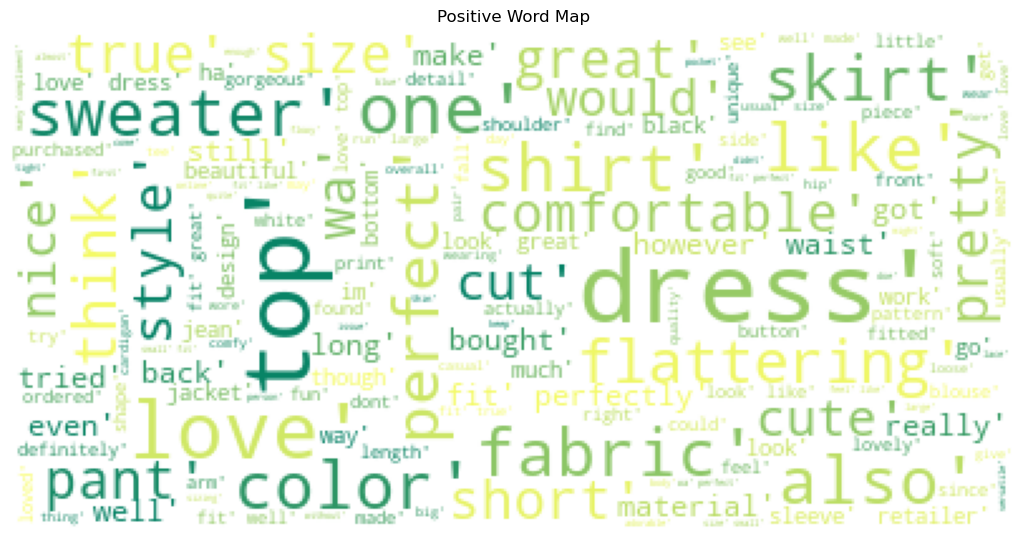

In [ ]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Word Map")
plt.savefig("PostitiveWords")
plt.show()


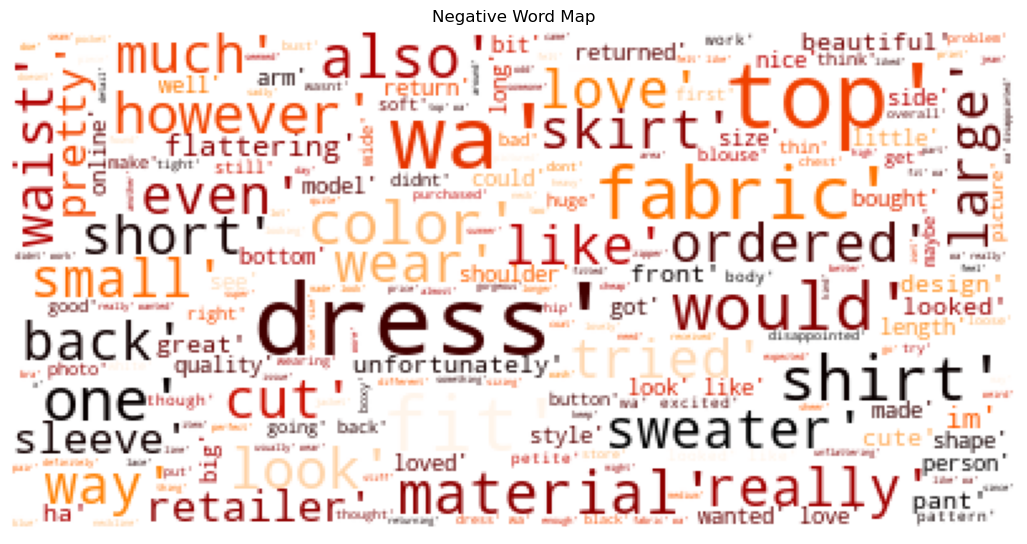

In [ ]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative Word Map")
plt.savefig("NegativeWords")
plt.show()

In [ ]:
df['Reviews']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [wa, happy, snag, dress, great, price, easy, s...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, wa, see, never, would, worked...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Reviews, Length: 22628, dtype: object

In [ ]:
df['Reviews'] = df['Reviews'].astype(str)

In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

# Sentiment Analysis

Polarity is the emotion expressed in the sentence. It can be positive, neagtive and neutral.

The polarity score is a float within the range [-1.0, 1.0]

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['Polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews,Polarity
0,33,,"['absolutely', 'wonderful', 'silky', 'and', 's...",4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', 'silky', 'sexy', '...",0.633333
1,34,,"['love', 'this', 'dress', 'it', 'sooo', 'prett...",5,1,4,General,Dresses,Dresses,"['love', 'dress', 'sooo', 'pretty', 'happened'...",0.318750
2,60,Some major design flaws,"['i', 'had', 'such', 'high', 'hope', 'for', 't...",3,0,0,General,Dresses,Dresses,"['high', 'hope', 'dress', 'really', 'wanted', ...",0.082300
3,50,My favorite buy!,"['i', 'love', 'love', 'love', 'this', 'jumpsui...",5,1,0,General Petite,Bottoms,Pants,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",0.500000
4,47,Flattering shirt,"['this', 'shirt', 'is', 'very', 'flattering', ...",5,1,6,General,Tops,Blouses,"['shirt', 'flattering', 'due', 'adjustable', '...",0.458333


In [ ]:
"""
df['Polarity Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['pos'])
"""

"\ndf['Polarity Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])\ndf['Neutral Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['neu'])\ndf['Negative Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['neg'])\ndf['Positive Score'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['pos'])\n"

In [ ]:
#Converting Polarity Score to categorical values:
df['Sentiment'] = ''
df.loc[df['Polarity']>=0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity']==0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity']<=0, 'Sentiment'] = 'Negative'

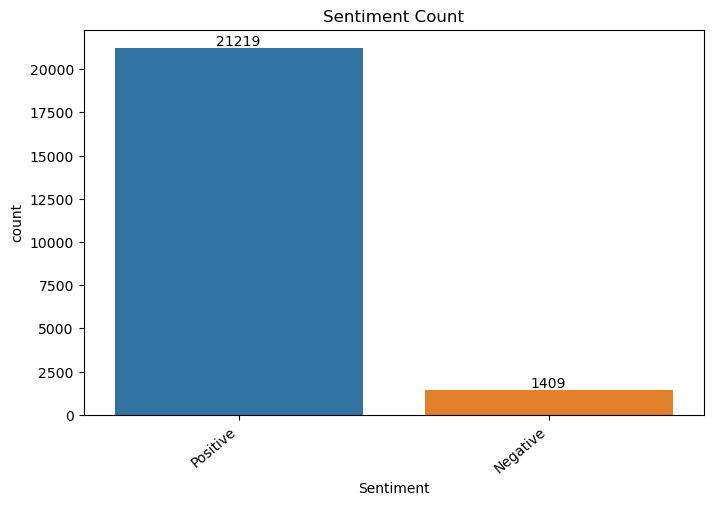

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Sentiment',data=df )
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Sentiment Count")
plt.savefig("SentimentBarGraph.jpg")

In [ ]:
#pip install wordcloud

In [ ]:
df['Polarity'].describe()

count    22628.000000
mean         0.254460
std          0.173225
min         -0.916667
25%          0.145530
50%          0.250000
75%          0.358333
max          1.000000
Name: Polarity, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


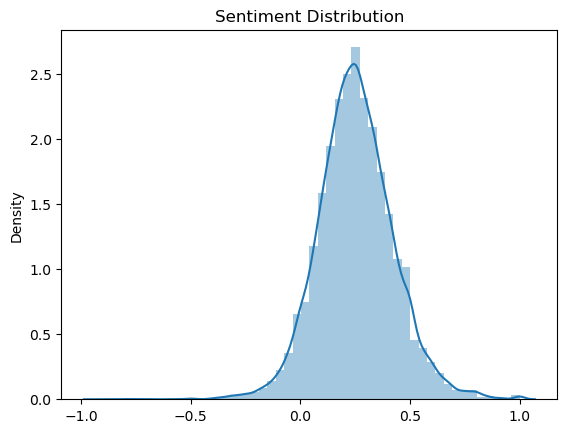

In [ ]:
sns.distplot(df[['Polarity']] ,hist=True)
plt.title("Sentiment Distribution")
plt.savefig("SentimentDist.jpg")

In [ ]:
df[df['Sentiment']=='Neutral']

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews,Polarity,Sentiment


# Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.fit(df["Reviews"])
T = vect.transform(df["Reviews"])


In [ ]:
y = df["Recommended IND"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    T, y, test_size=0.20, random_state=23, stratify=y)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(metrics.accuracy_score(model.predict(X_train), y_train)))
print("Train Set ROC: {}\n".format(metrics.roc_auc_score(model.predict(X_train), y_train)))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(model.predict(X_valid), y_valid)))
print("Validation Set ROC: {}".format(metrics.roc_auc_score(model.predict(X_valid), y_valid)))

Train Set Accuracy: 0.9106728538283063
Train Set ROC: 0.8891164686377453

Validation Set Accuracy: 0.8873177198409191
Validation Set ROC: 0.8418648253155296


In [ ]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(metrics.accuracy_score(svc_model.predict(X_train), y_train)))
print("Train Set ROC: {}\n".format(metrics.roc_auc_score(svc_model.predict(X_train), y_train)))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(svc_model.predict(X_valid), y_valid)))
print("Validation Set ROC: {}".format(metrics.roc_auc_score(svc_model.predict(X_valid), y_valid)))

Train Set Accuracy: 0.979891724671307
Train Set ROC: 0.9796543498082697

Validation Set Accuracy: 0.8897481219619974
Validation Set ROC: 0.8432609855621805


In [ ]:
k_model = KNeighborsClassifier(n_neighbors=3)
k_model.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(metrics.accuracy_score(k_model.predict(X_train), y_train)))
print("Train Set ROC: {}\n".format(metrics.roc_auc_score(k_model.predict(X_train), y_train)))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(k_model.predict(X_valid), y_valid)))
print("Validation Set ROC: {}".format(metrics.roc_auc_score(k_model.predict(X_valid), y_valid)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Set Accuracy: 0.9084079107280963


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Set ROC: 0.8847255561812515



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Validation Set Accuracy: 0.8413610251878038
Validation Set ROC: 0.7373701259014791


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

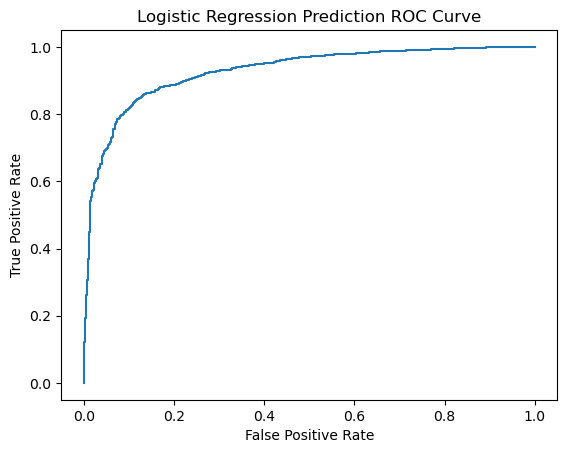

In [ ]:
#ROC Curver of Logistic Regression
#define metrics
y_pred_lr = model.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_lr)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Logistic Regression Prediction ROC Curve")
plt.savefig("LR_ROC,jpg")
plt.show()

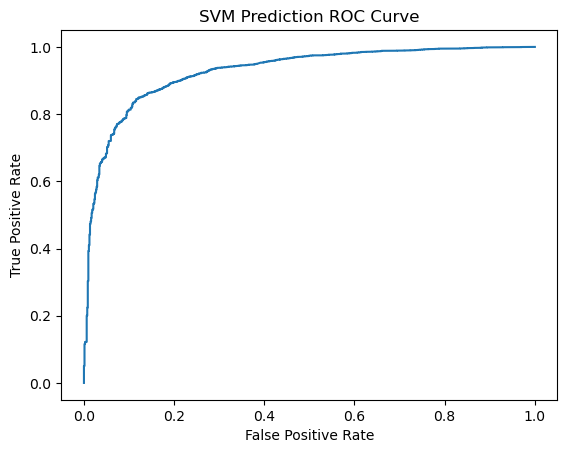

In [ ]:
#ROC Curver of SVM
#define metrics
y_pred_svc = svc_model.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_svc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("SVM Prediction ROC Curve")
plt.savefig("SVM_ROC.jpg")
plt.show()

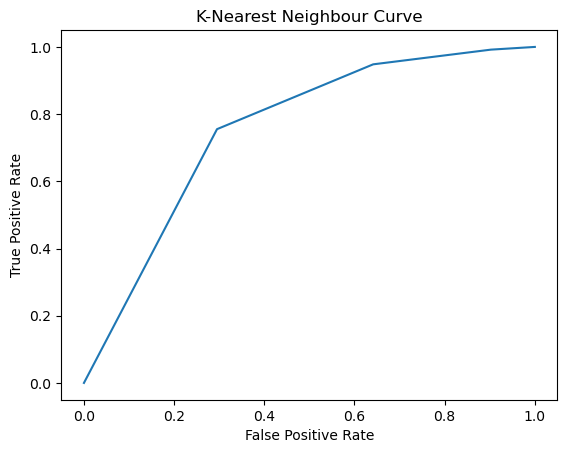

In [ ]:
#ROC Curver of K-nearest Neighbour
#define metrics
y_pred_kn = k_model.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_kn)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("K-Nearest Neighbour Curve")
plt.savefig("K_ROC.jpg")
plt.show()